
¡Hola, Gonzalo!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [18]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import math as mt
from scipy import stats as st



<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con la carga de math para hacer el redondeo con otros métodos

## Cargar datos

In [19]:
# Carga los archivos de datos en diferentes DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

In [20]:
df_calls.info()
print()
print(df_calls.head())
print()
print()
df_internet.info()
print()
print(df_internet.head())
print()
print()
df_messages.info()
print()
print(df_messages.head())
print()
print()
df_plans.info()
print()
print(df_plans.head())
print()
print()
df_users.info()
print()
print(df_users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null 

## Tarifas

In [21]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [22]:
# Imprime una muestra de los datos para las tarifas

print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


En la info general podemos observar que todo gira en función a 2 tipos de datos por cada columna ya que unicamente estamos estudiando estos 2 tipos de planes. No veo problemas evidentes al menos en este df.

## Corregir datos

## Enriquecer los datos

In [23]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included']/1024
print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-info">
<b>Se realizó la transformación.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

Enriquecemos los datos convirtiendo los mb a gb ya que en esta medida se cobra el plan.

## Usuarios/as

In [24]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

df_users.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



In [25]:
# Imprime una muestra de datos para usuarios

print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


El problema en este caso son las columnas user_id y reg_date, en el primer caso porque debería ser un dato tipo string u object y en el segundo caso debería transformarse a un tipo de dato datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [26]:
print('Data Frame Usuarios')
print()
df_users['user_id'] = df_users['user_id'].astype('str')
print(df_users['user_id'].head())
print()
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
print(df_users['reg_date'].head())

Data Frame Usuarios

0    1000
1    1001
2    1002
3    1003
4    1004
Name: user_id, dtype: object

0   2018-12-24
1   2018-08-13
2   2018-10-21
3   2018-01-28
4   2018-05-23
Name: reg_date, dtype: datetime64[ns]


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-info">
<b>Se añadió el argumento para asegurar la transformación correcta.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

### Enriquecer los datos

## Llamadas

In [27]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [28]:
# Imprime una muestra de datos para las llamadas

print(df_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


El problema en este caso son las columnas call_date y duration, en el primer caso porque debería ser un dato tipo string u object y en el segundo caso debería transformarse a un tipo de dato datetime.

### Corregir los datos

In [29]:
print('Data Frame Llamadas')
print()
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
print(df_calls['call_date'].head())
print()
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)
print(df_calls)

Data Frame Llamadas

0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: call_date, dtype: datetime64[ns]

              id  user_id  call_date  duration
0        1000_93     1000 2018-12-27         9
1       1000_145     1000 2018-12-27        14
2       1000_247     1000 2018-12-27        15
3       1000_309     1000 2018-12-28         6
4       1000_380     1000 2018-12-30         5
...          ...      ...        ...       ...
137730  1499_199     1499 2018-11-21         9
137731  1499_200     1499 2018-10-20        11
137732  1499_201     1499 2018-09-21         9
137733  1499_202     1499 2018-10-10         1
137734  1499_203     1499 2018-12-29        14

[137735 rows x 4 columns]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo en redondear la duración de las llamadas.
    
</div>

### Enriquecer los datos

En la celda de corrección incluí en el código una función para redondear hacia arriba como indica el enunciado que hace la empresa de telefonía.

## Mensajes

In [30]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [31]:
# Imprime una muestra de datos para los mensajes

print(df_messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


El problema son las columnas user_id y message date, basicamente el problema es el tipo de dato que deberia ser string u object en el primer caso y en el segundo timedate.

### Corregir los datos

In [32]:
print('Data Frame SMS')
print()
df_messages['user_id'] = df_messages['user_id'].astype('str')
print(df_messages['user_id'].head())
print()
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
print(df_messages['message_date'].head())
print()

Data Frame SMS

0    1000
1    1000
2    1000
3    1000
4    1000
Name: user_id, dtype: object

0   2018-12-27
1   2018-12-31
2   2018-12-31
3   2018-12-27
4   2018-12-26
Name: message_date, dtype: datetime64[ns]



### Enriquecer los datos

## Internet

In [33]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [34]:
# Imprime una muestra de datos para el tráfico de internet

print(df_internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


El problema es el mismo aqui con la columna user_id y session_date, en el primer caso el tipo de dato string y en el segundo convertir la columna a timedate.

### Corregir los datos

In [35]:
print('Data Frame Datos')
print()
df_internet['user_id'] = df_internet['user_id'].astype('str')
print(df_internet['user_id'].head())
print()
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
print(df_internet['session_date'].head())

Data Frame Datos

0    1000
1    1000
2    1000
3    1000
4    1000
Name: user_id, dtype: object

0   2018-12-29
1   2018-12-31
2   2018-12-28
3   2018-12-26
4   2018-12-27
Name: session_date, dtype: datetime64[ns]


### Enriquecer los datos

In [36]:
df_internet['gb_used'] = np.ceil(df_internet['mb_used']/1024).astype(int)
print(df_internet.head())

         id user_id session_date  mb_used  gb_used
0   1000_13    1000   2018-12-29    89.86        1
1  1000_204    1000   2018-12-31     0.00        0
2  1000_379    1000   2018-12-28   660.40        1
3  1000_413    1000   2018-12-26   270.99        1
4  1000_442    1000   2018-12-27   880.22        1


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

<div class="alert alert-block alert-info">
<b>Se realizó la conversión a gb redondeando al entero superior.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Estudiar las condiciones de las tarifas

In [37]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Agregar datos por usuario



In [38]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls['month'] = df_calls['call_date'].dt.month

df_calls.dropna(inplace = True)

total_calls_user_month = df_calls.groupby(['user_id', 'month'])['id'].count()
print(total_calls_user_month)


user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: id, Length: 2258, dtype: int64



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [39]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

total_minutes_user_month = df_calls.groupby(['user_id', 'month'])['duration'].sum()
print(total_minutes_user_month)

user_id  month
1000     12       124
1001     8        182
         9        315
         10       393
         11       426
                 ... 
1498     12       339
1499     9        346
         10       385
         11       308
         12       496
Name: duration, Length: 2258, dtype: int64


In [40]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

df_messages['month'] = df_messages['message_date'].dt.month

df_messages.dropna(inplace=True)

total_sms_user_month = df_messages.groupby(['user_id', 'month'])['id'].count()
print(total_sms_user_month)

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64


In [60]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

df_internet['month'] = df_internet['session_date'].dt.month

df_internet.dropna(inplace=True)

total_data_user_month = df_internet.groupby(['user_id', 'month'])['gb_used'].sum()
print(total_data_user_month)

user_id  month
1000     12        4
1001     8        21
         9        41
         10       50
         11       49
                  ..
1498     12       56
1499     9        37
         10       52
         11       43
         12       58
Name: gb_used, Length: 2277, dtype: int64


In [61]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

month_calls_df = total_calls_user_month.to_frame(name='total_calls').reset_index()
month_minutes_df = total_minutes_user_month.to_frame(name='total_minutes').reset_index()
month_sms_df = total_sms_user_month.to_frame(name='total_sms').reset_index()
month_data_df = total_data_user_month.to_frame(name='total_data').reset_index()

month_calls_df['user_id'] = month_calls_df['user_id'].astype(str)
month_minutes_df['user_id'] = month_minutes_df['user_id'].astype(str)
month_sms_df['user_id'] = month_sms_df['user_id'].astype(str)
month_data_df['user_id'] = month_data_df['user_id'].astype(str)

month_calls_df['month'] = month_calls_df['month'].astype(int)
month_minutes_df['month'] = month_minutes_df['month'].astype(int)
month_sms_df['month'] = month_sms_df['month'].astype(int)
month_data_df['month'] = month_data_df['month'].astype(int)

calls_minutes = month_calls_df.merge(month_minutes_df, on=['user_id', 'month'], how='outer', suffixes=('_number_calls', '_number_minutes'))
print(calls_minutes)

calls_minutes_sms = calls_minutes.merge(month_sms_df, on=['user_id', 'month'], how='outer')
print(calls_minutes_sms)

consumption_month = calls_minutes_sms.merge(month_data_df, on=['user_id', 'month'], how='outer')
print(consumption_month)

     user_id  month  total_calls  total_minutes
0       1000     12           16            124
1       1001      8           27            182
2       1001      9           49            315
3       1001     10           65            393
4       1001     11           64            426
...      ...    ...          ...            ...
2253    1498     12           39            339
2254    1499      9           41            346
2255    1499     10           53            385
2256    1499     11           45            308
2257    1499     12           65            496

[2258 rows x 4 columns]
     user_id  month  total_calls  total_minutes  total_sms
0       1000     12         16.0          124.0       11.0
1       1001      8         27.0          182.0       30.0
2       1001      9         49.0          315.0       44.0
3       1001     10         65.0          393.0       53.0
4       1001     11         64.0          426.0       36.0
...      ...    ...          ...            .

In [43]:
# Añade la información de la tarifa

df_plans_names = df_users[['user_id', 'plan']]

consumption_month_plan = consumption_month.merge(df_plans_names, on='user_id')
print(consumption_month_plan)

     user_id  month  total_calls  total_minutes  total_sms  total_data  \
0       1000     12         16.0          124.0       11.0     1901.47   
1       1001      8         27.0          182.0       30.0     6919.15   
2       1001      9         49.0          315.0       44.0    13314.82   
3       1001     10         65.0          393.0       53.0    22330.49   
4       1001     11         64.0          426.0       36.0    18504.30   
...      ...    ...          ...            ...        ...         ...   
2288    1204     12          NaN            NaN       78.0    36730.05   
2289    1349     10          NaN            NaN       76.0    13093.55   
2290    1349     11          NaN            NaN       72.0    17128.26   
2291    1349     12          NaN            NaN       61.0    13039.91   
2292    1108     12          NaN            NaN        NaN      233.17   

          plan  
0     ultimate  
1         surf  
2         surf  
3         surf  
4         surf  
...      

In [44]:
# Calcula el ingreso mensual para cada usuario

consumption_full = consumption_month_plan.merge(df_plans, left_on='plan', right_on='plan_name', how='left')

def calcular_ingresos(fila):

    excedente_minutos = max(0, fila['total_minutes'] - fila['minutes_included'])
    excedente_mensajes = max(0, fila['total_sms'] - fila['messages_included'])
    excedente_datos = max(0, fila['total_data'] - (fila['mb_per_month_included'] / 1024))

    cargo_minutos = excedente_minutos * fila['usd_per_minute']
    cargo_mensajes = excedente_mensajes * fila['usd_per_message']
    cargo_datos = excedente_datos * fila['usd_per_gb']
    
    total = fila['usd_monthly_pay'] + cargo_minutos + cargo_mensajes + cargo_datos
    return total

consumption_full['monthly_revenue'] = consumption_full.apply(calcular_ingresos, axis=1)

print(consumption_full[['user_id', 'month', 'plan', 'monthly_revenue']])
print()
print()
print(consumption_full)


     user_id  month      plan  monthly_revenue
0       1000     12  ultimate         13170.29
1       1001      8      surf         69061.50
2       1001      9      surf        133018.20
3       1001     10      surf        223174.99
4       1001     11      surf        184913.00
...      ...    ...       ...              ...
2288    1204     12  ultimate        256970.35
2289    1349     10      surf        130806.28
2290    1349     11      surf        171153.26
2291    1349     12      surf        130269.43
2292    1108     12  ultimate          1492.19

[2293 rows x 4 columns]


     user_id  month  total_calls  total_minutes  total_sms  total_data  \
0       1000     12         16.0          124.0       11.0     1901.47   
1       1001      8         27.0          182.0       30.0     6919.15   
2       1001      9         49.0          315.0       44.0    13314.82   
3       1001     10         65.0          393.0       53.0    22330.49   
4       1001     11         64.0       

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div class="alert alert-block alert-info">
<b>Ya está todo redondeado código arriba.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Estudia el comportamiento de usuario

### Llamadas

plan      month
surf      1        203.000000
          2        297.000000
          3        330.000000
          4        351.540000
          5        410.240000
          6        435.791667
          7        453.733333
          8        417.849057
          9        420.732984
          10       438.991379
          11       432.494585
          12       484.501608
ultimate  1        193.500000
          2        470.333333
          3        304.250000
          4        336.857143
          5        406.241379
          6        387.444444
          7        427.067797
          8        421.436620
          9        437.511628
          10       455.028571
          11       448.730159
          12       465.261745
Name: total_minutes, dtype: float64




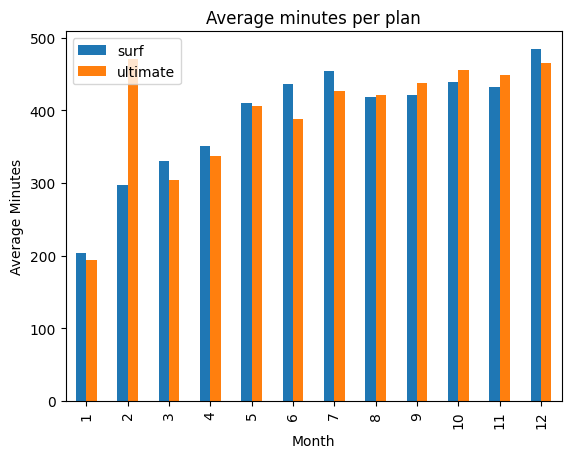

In [45]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

from matplotlib import pyplot as plt

planmonth_call_duration_mean = consumption_month_plan.groupby(['plan', 'month'])['total_minutes'].mean()
print(planmonth_call_duration_mean)
print()
print()
minutos_plan_mensual = planmonth_call_duration_mean.unstack('plan')
minutos_plan_mensual.plot(kind= 'bar', title='Average minutes per plan', xlabel= 'Month', ylabel= 'Average Minutes')

plt.legend(['surf', 'ultimate'])
plt.show()


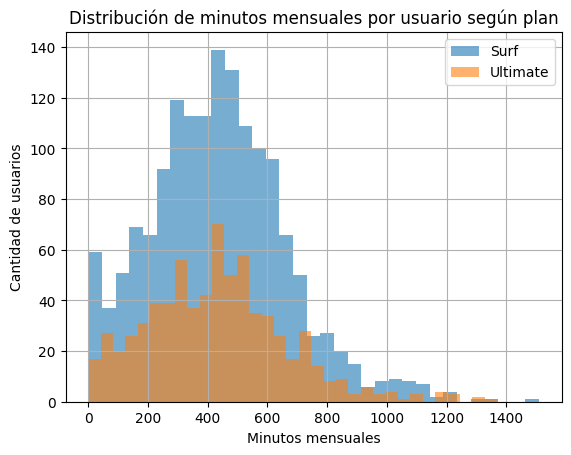

In [46]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

surf_month_minutes = consumption_month_plan[consumption_month_plan['plan'] == 'surf']['total_minutes']
ultimate_month_minutes = consumption_month_plan[consumption_month_plan['plan'] == 'ultimate']['total_minutes']

plt.hist(surf_month_minutes, bins=33, alpha=0.6, label='Surf')
plt.hist(ultimate_month_minutes, bins=33, alpha=0.6, label='Ultimate')

plt.title('Distribución de minutos mensuales por usuario según plan')
plt.xlabel('Minutos mensuales')
plt.ylabel('Cantidad de usuarios')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Calcula la media y la varianza de la duración mensual de llamadas.
plan_month_call_duration = consumption_month_plan.groupby(['month', 'plan'])['total_minutes'].sum()
plan_month_call_duration_df = plan_month_call_duration.reset_index()
print(plan_month_call_duration_df)
surf_month_call_duration = plan_month_call_duration_df[plan_month_call_duration_df['plan'] == 'surf']['total_minutes']
ultimate_month_call_duration = plan_month_call_duration_df[plan_month_call_duration_df['plan'] == 'ultimate']['total_minutes']
print()
print()
print('Consumo minutos mensual plan surf:', surf_month_call_duration)
print('Consumo minutos mensual plan ultimate:', ultimate_month_call_duration)
print()
print()
print('Promedio consumo minutos mensual plan surf', surf_month_call_duration.mean())
print('Promedio consumo minutos mensual plan ultimate', ultimate_month_call_duration.mean())
print()
print()
print('Varianza consumo minutos mensual plan surf', surf_month_call_duration.var())
print('Varianza consumo minutos mensual plan ultimate', ultimate_month_call_duration.var())

    month      plan  total_minutes
0       1      surf          406.0
1       1  ultimate          774.0
2       2      surf         2673.0
3       2  ultimate         2822.0
4       3      surf         7590.0
5       3  ultimate         3651.0
6       4      surf        17577.0
7       4  ultimate         7074.0
8       5      surf        30768.0
9       5  ultimate        11781.0
10      6      surf        41836.0
11      6  ultimate        17435.0
12      7      surf        54448.0
13      7  ultimate        25197.0
14      8      surf        66438.0
15      8  ultimate        29922.0
16      9      surf        80360.0
17      9  ultimate        37626.0
18     10      surf       101846.0
19     10  ultimate        47778.0
20     11      surf       119801.0
21     11  ultimate        56540.0
22     12      surf       150680.0
23     12  ultimate        69324.0


Consumo minutos mensual plan surf: 0        406.0
2       2673.0
4       7590.0
6      17577.0
8      30768.0
10     41836.

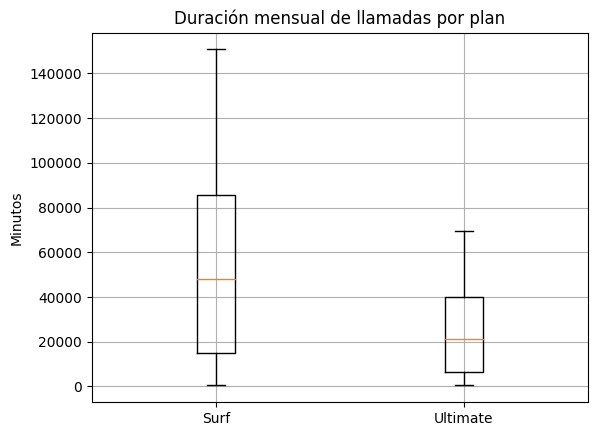

In [48]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

import seaborn as sns

#sns.boxplot(surf_month_call_duration)
#sns.boxplot(ultimate_month_call_duration)

plt.boxplot([surf_month_call_duration, ultimate_month_call_duration], labels=['Surf', 'Ultimate'])
plt.title('Duración mensual de llamadas por plan')
plt.ylabel('Minutos')
plt.grid(True)
plt.show()

Al tener menor limite de llamadas, los clientes de surf tienden a comprar minutos extras, en cambio los de ultimate, suelen estar en el límite o en menor proporción suelen consumir minutos extras.

### Mensajes

plan      month
surf      1        21.000000
          2        21.600000
          3        21.937500
          4        24.166667
          5        33.017857
          6        33.616438
          7        35.945055
          8        37.596774
          9        39.523179
          10       42.433862
          11       40.553097
          12       48.326772
ultimate  1        20.666667
          2        25.166667
          3        34.714286
          4        28.937500
          5        44.333333
          6        36.289474
          7        41.212766
          8        47.929825
          9        45.901408
          10       46.977528
          11       47.601942
          12       53.936508
Name: total_sms, dtype: float64




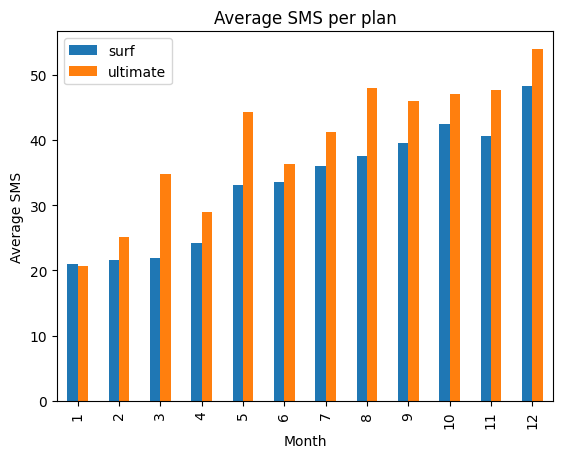

In [49]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

planmonth_sms_quantity_mean = consumption_month_plan.groupby(['plan', 'month'])['total_sms'].mean()
print(planmonth_sms_quantity_mean)
print()
print()
sms_plan_mensual = planmonth_sms_quantity_mean.unstack('plan')
sms_plan_mensual.plot(kind= 'bar', title='Average SMS per plan', xlabel= 'Month', ylabel= 'Average SMS')

plt.legend(['surf', 'ultimate'])
plt.show()

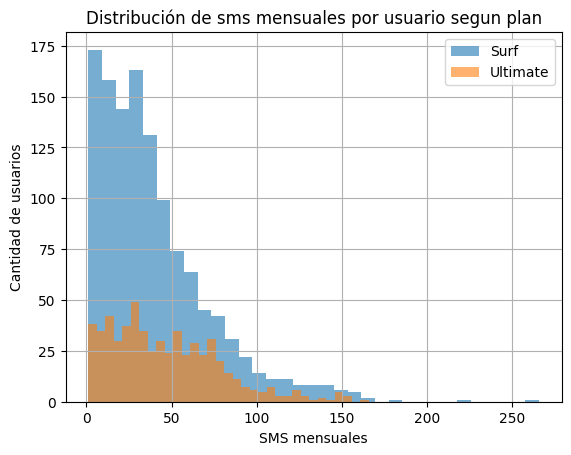

In [50]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

surf_month_sms = consumption_month_plan[consumption_month_plan['plan'] == 'surf']['total_sms']
ultimate_month_sms = consumption_month_plan[consumption_month_plan['plan'] == 'ultimate']['total_sms']

plt.hist(surf_month_sms, bins=33, alpha=0.6, label='Surf')
plt.hist(ultimate_month_sms, bins=33, alpha=0.6, label='Ultimate')

plt.title('Distribución de sms mensuales por usuario segun plan')
plt.xlabel('SMS mensuales')
plt.ylabel('Cantidad de usuarios')
plt.legend()
plt.grid(True)
plt.show()

    month      plan  total_sms
0       1      surf       21.0
1       1  ultimate       62.0
2       2      surf      108.0
3       2  ultimate      151.0
4       3      surf      351.0
5       3  ultimate      243.0
6       4      surf      870.0
7       4  ultimate      463.0
8       5      surf     1849.0
9       5  ultimate      931.0
10      6      surf     2454.0
11      6  ultimate     1379.0
12      7      surf     3271.0
13      7  ultimate     1937.0
14      8      surf     4662.0
15      8  ultimate     2732.0
16      9      surf     5968.0
17      9  ultimate     3259.0
18     10      surf     8020.0
19     10  ultimate     4181.0
20     11      surf     9165.0
21     11  ultimate     4903.0
22     12      surf    12275.0
23     12  ultimate     6796.0


Consumo SMS mensual plan surf: 0        21.0
2       108.0
4       351.0
6       870.0
8      1849.0
10     2454.0
12     3271.0
14     4662.0
16     5968.0
18     8020.0
20     9165.0
22    12275.0
Name: total_sms, dtype: 

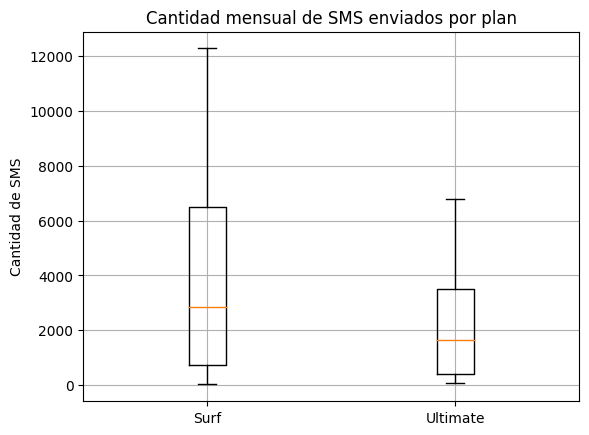

In [51]:
plan_month_sms_sent = consumption_month_plan.groupby(['month', 'plan'])['total_sms'].sum()
plan_month_sms_sent_df = plan_month_sms_sent.reset_index()
print(plan_month_sms_sent_df)
surf_month_sms_sent = plan_month_sms_sent_df[plan_month_sms_sent_df['plan'] == 'surf']['total_sms']
ultimate_month_sms_sent = plan_month_sms_sent_df[plan_month_sms_sent_df['plan'] == 'ultimate']['total_sms']
print()
print()
print('Consumo SMS mensual plan surf:', surf_month_sms_sent)
print('Consumo SMS mensual plan ultimate:', ultimate_month_sms_sent)
print()
print()
print('Promedio consumo SMS mensual plan surf', surf_month_sms_sent.mean())
print('Promedio consumo SMS mensual plan ultimate', ultimate_month_sms_sent.mean())
print()
print()
print('Varianza consumo SMS mensual plan surf', surf_month_sms_sent.var())
print('Varianza consumo SMS mensual plan ultimate', ultimate_month_sms_sent.var())
print()
print()
plt.boxplot([surf_month_sms_sent, ultimate_month_sms_sent], labels=['Surf', 'Ultimate'])
plt.title('Cantidad mensual de SMS enviados por plan')
plt.ylabel('Cantidad de SMS')
plt.grid(True)
plt.show()

En la misma linea de los minutos consumidos, los usuarios del plan surf suelen desviarse mas, por lo que se puede concluir que hay un gran numero de usuarios pagando sms extra pero tambien hay una mayor base de clientes.

### Internet

plan      month
surf      1         4874.860000
          2        12178.843333
          3        13345.440000
          4        12228.778571
          5        14119.728026
          6        15623.666632
          7        16923.463917
          8        17112.224403
          9        16677.397254
          10       17533.275256
          11       16455.548043
          12       18189.669590
ultimate  1         6918.092500
          2        17128.808571
          3        18321.518333
          4        16121.654762
          5        16624.482414
          6        15337.921064
          7        16344.744407
          8        17814.720141
          9        16969.869535
          10       17780.292000
          11       17033.685354
          12       18323.191854
Name: total_data, dtype: float64




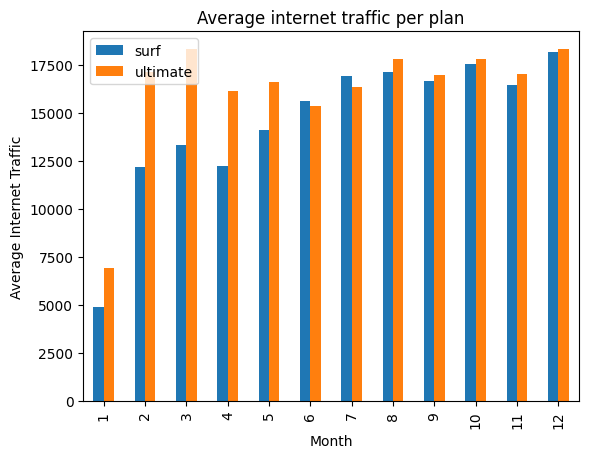

In [52]:
planmonth_internet_traffic_mean = consumption_month_plan.groupby(['plan', 'month'])['total_data'].mean()
print(planmonth_internet_traffic_mean)
print()
print()
internet_plan_mensual = planmonth_internet_traffic_mean.unstack('plan')
internet_plan_mensual.plot(kind= 'bar', title='Average internet traffic per plan', xlabel= 'Month', ylabel= 'Average Internet Traffic')

plt.legend(['surf', 'ultimate'])
plt.show()

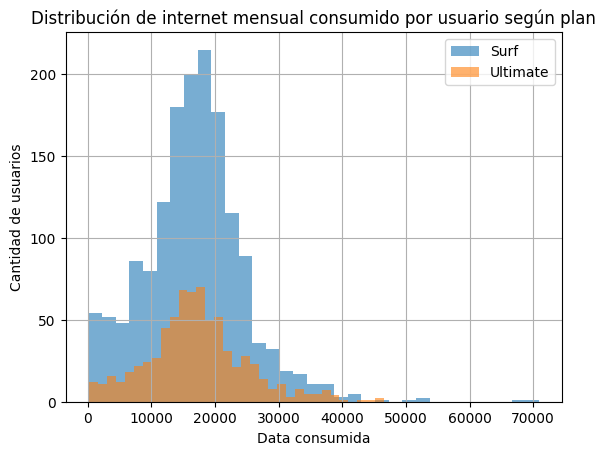

In [53]:
surf_month_internet = consumption_month_plan[consumption_month_plan['plan'] == 'surf']['total_data']
ultimate_month_internet = consumption_month_plan[consumption_month_plan['plan'] == 'ultimate']['total_data']

plt.hist(surf_month_internet, bins=33, alpha=0.6, label='Surf')
plt.hist(ultimate_month_internet, bins=33, alpha=0.6, label='Ultimate')

plt.title('Distribución de internet mensual consumido por usuario según plan')
plt.xlabel('Data consumida')
plt.ylabel('Cantidad de usuarios')
plt.legend()
plt.grid(True)
plt.show()

    month      plan  total_data
0       1      surf     9749.72
1       1  ultimate    27672.37
2       2      surf   109609.59
3       2  ultimate   119901.66
4       3      surf   306945.12
5       3  ultimate   219858.22
6       4      surf   599210.15
7       4  ultimate   338554.75
8       5      surf  1073099.33
9       5  ultimate   482109.99
10      6      surf  1484248.33
11      6  ultimate   720882.29
12      7      surf  2030815.67
13      7  ultimate   964339.92
14      8      surf  2720843.68
15      8  ultimate  1264845.13
16      9      surf  3218737.67
17      9  ultimate  1459408.78
18     10      surf  4102786.41
19     10  ultimate  1866930.66
20     11      surf  4624009.00
21     11  ultimate  2163278.04
22     12      surf  5766125.26
23     12  ultimate  2766801.97


Consumo data mensual plan surf: 0        9749.72
2      109609.59
4      306945.12
6      599210.15
8     1073099.33
10    1484248.33
12    2030815.67
14    2720843.68
16    3218737.67
18    4102786

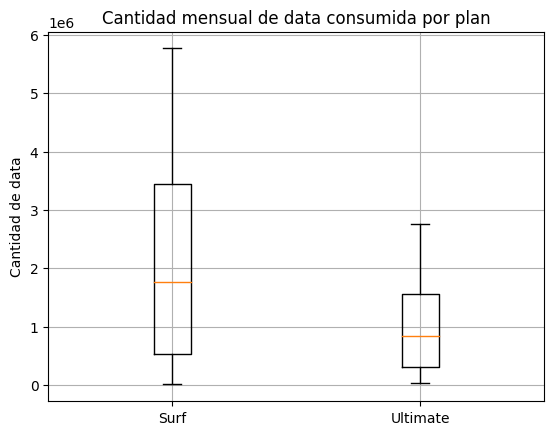

In [54]:
plan_month_internet_traffic = consumption_month_plan.groupby(['month', 'plan'])['total_data'].sum()
plan_month_internet_traffic_df = plan_month_internet_traffic.reset_index()
print(plan_month_internet_traffic_df)
surf_month_internet_traffic = plan_month_internet_traffic_df[plan_month_internet_traffic_df['plan'] == 'surf']['total_data']
ultimate_month_internet_traffic = plan_month_internet_traffic_df[plan_month_internet_traffic_df['plan'] == 'ultimate']['total_data']
print()
print()
print('Consumo data mensual plan surf:', surf_month_internet_traffic)
print('Consumo data mensual plan ultimate:', ultimate_month_internet_traffic)
print()
print()
print('Promedio consumo data mensual plan surf', surf_month_internet_traffic.mean())
print('Promedio consumo data mensual plan ultimate', ultimate_month_internet_traffic.mean())
print()
print()
print('Varianza consumo data mensual plan surf', surf_month_internet_traffic.var())
print('Varianza consumo data mensual plan ultimate', ultimate_month_internet_traffic.var())
print()
print()
plt.boxplot([surf_month_internet_traffic, ultimate_month_internet_traffic], labels=['Surf', 'Ultimate'])
plt.title('Cantidad mensual de data consumida por plan')
plt.ylabel('Cantidad de data')
plt.grid(True)
plt.show()

La tendencia se confirma, el promedio de consumo en gigas es mayor en el plan mas bajo, en cambio en ultimate no parece haber indicios de que mucha gente se pase de su plan.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

plan      month
surf      1         48618.600000
          2        121659.496667
          3        133325.123913
          4        119716.140600
          5        139237.281429
          6        152890.135052
          7        167709.588926
          8        167827.923765
          9        165786.708093
          10       172987.295063
          11       163265.566113
          12       181198.018050
ultimate  1         48286.647500
          2        119761.660000
          3        128110.628333
          4        112711.583333
          5        116231.376897
          6        107225.447447
          7        114273.210847
          8        124563.040986
          9        118649.086744
          10       123149.854906
          11       119095.797480
          12       128122.342980
Name: monthly_revenue, dtype: float64




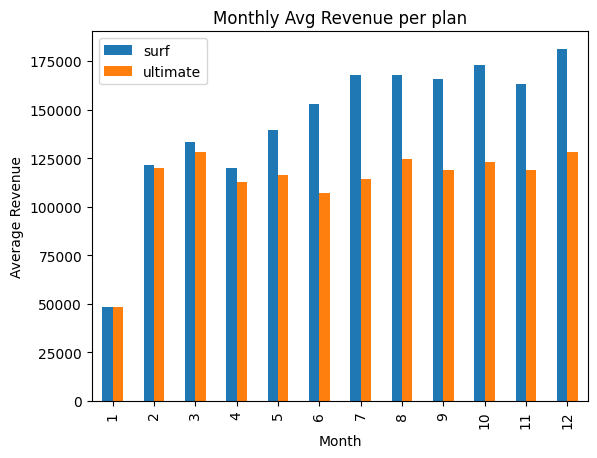

In [55]:
plan_month_revenue_mean = consumption_full.groupby(['plan', 'month'])['monthly_revenue'].mean()
print(plan_month_revenue_mean)
print()
print()
ingreso_plan_mensual = plan_month_revenue_mean.unstack('plan')
ingreso_plan_mensual.plot(kind= 'bar', title='Monthly Avg Revenue per plan', xlabel= 'Month', ylabel= 'Average Revenue')

plt.legend(['surf', 'ultimate'])
plt.show()

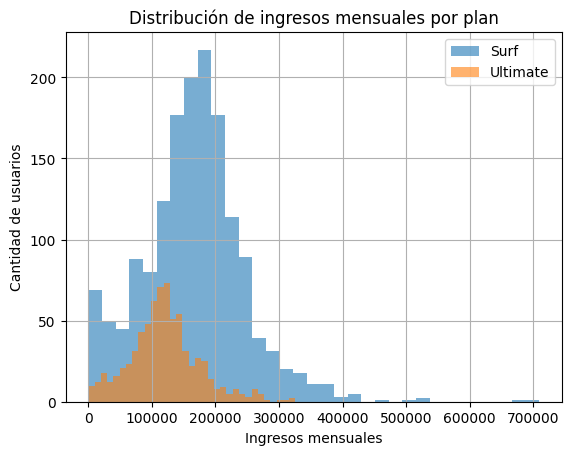

In [56]:
surf_month_revenue = consumption_full[consumption_full['plan'] == 'surf']['monthly_revenue']
ultimate_month_revenue = consumption_full[consumption_full['plan'] == 'ultimate']['monthly_revenue']

plt.hist(surf_month_revenue, bins=33, alpha=0.6, label='Surf')
plt.hist(ultimate_month_revenue, bins=33, alpha=0.6, label='Ultimate')

plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Ingresos mensuales')
plt.ylabel('Cantidad de usuarios')
plt.legend()
plt.grid(True)
plt.show()

    month      plan  total_data
0       1      surf     9749.72
1       1  ultimate    27672.37
2       2      surf   109609.59
3       2  ultimate   119901.66
4       3      surf   306945.12
5       3  ultimate   219858.22
6       4      surf   599210.15
7       4  ultimate   338554.75
8       5      surf  1073099.33
9       5  ultimate   482109.99
10      6      surf  1484248.33
11      6  ultimate   720882.29
12      7      surf  2030815.67
13      7  ultimate   964339.92
14      8      surf  2720843.68
15      8  ultimate  1264845.13
16      9      surf  3218737.67
17      9  ultimate  1459408.78
18     10      surf  4102786.41
19     10  ultimate  1866930.66
20     11      surf  4624009.00
21     11  ultimate  2163278.04
22     12      surf  5766125.26
23     12  ultimate  2766801.97


Ingreso mensual plan surf: 0        97237.20
2      1094935.47
4      3066477.85
6      5985807.03
8     10721270.67
10    14830343.10
12    20292860.26
14    27188123.65
16    32162621.37
18    409

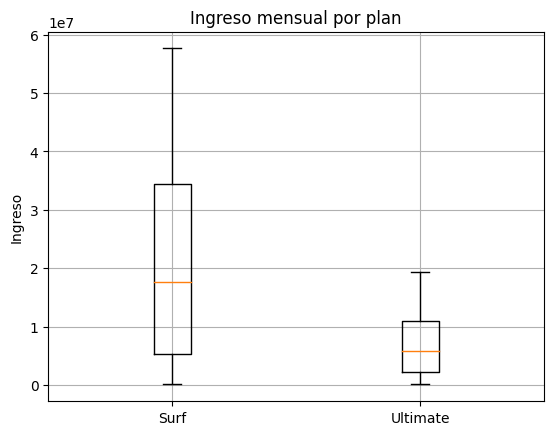

In [57]:
plan_month_revenue = consumption_full.groupby(['month', 'plan'])['monthly_revenue'].sum()
plan_month_revenue_df = plan_month_revenue.reset_index()
print(plan_month_internet_traffic_df)
surf_month_revenue = plan_month_revenue_df[plan_month_revenue_df['plan'] == 'surf']['monthly_revenue']
ultimate_month_revenue = plan_month_revenue_df[plan_month_revenue_df['plan'] == 'ultimate']['monthly_revenue']
print()
print()
print('Ingreso mensual plan surf:', surf_month_revenue)
print('Ingreso mensual plan ultimate:', ultimate_month_revenue)
print()
print()
print('Promedio ingreso mensual plan surf', surf_month_revenue.mean())
print('Promedio ingreso mensual plan ultimate', ultimate_month_revenue.mean())
print()
print()
print('Varianza ingreso mensual plan surf', surf_month_revenue.var())
print('Varianza ingreso mensual plan ultimate', ultimate_month_revenue.var())
print()
print()
plt.boxplot([surf_month_revenue, ultimate_month_revenue], labels=['Surf', 'Ultimate'])
plt.title('Ingreso mensual por plan')
plt.ylabel('Ingreso')
plt.grid(True)
plt.show()

A nivel promedio se ve que los clientes del plan surf consumen mas a pesar de tener un menor plan, lo cual quiere decir que invierten bastante en extras y son mas rentables, en masa tambien son mas los clientes del plan surf y es por eso que la variabilidad de ingresos generadas por este grupo de gente es mayor que en ultimate que su consumo es mas uniforme.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

In [62]:
# Prueba las hipótesis

# Ho: Los ingresos promedio de los planes Ultimate y Surf son iguales
# H1: Los ingresos promedio de los planes Ultimate y Surf son distintos

from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(surf_month_revenue, ultimate_month_revenue, equal_var=False)
print('valor p: ', results.pvalue)
print()
print()
print('Promedio mensual ingresos plan Surf:', surf_month_revenue.mean())
print()
print('Promedio mensual ingresos plan Ultimate:', ultimate_month_revenue.mean())
if results.pvalue < alpha:
    print('Rechazamos hipótesis nula')
else:
    print('No podemos rechazar hipótesis nula')



valor p:  0.027112899630251965


Promedio mensual ingresos plan Surf: 21688565.87333333

Promedio mensual ingresos plan Ultimate: 7221791.371666667
Rechazamos hipótesis nula



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

<div class="alert alert-block alert-info">
<b>Se realizó la moficiación en el código. </b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

In [63]:
# Prueba las hipótesis

consumption_full_locations = consumption_full.merge(df_users, on='user_id')
print(consumption_full_locations)
print()
print()
users_NY_NJ = consumption_full_locations[consumption_full_locations['city'].str.contains('New York-Newark-Jersey City')]
print('Usuarios estados de NY y NJ', users_NY_NJ)
print()
print()
users_excluding_NYNJ = consumption_full_locations[~consumption_full_locations['city'].str.contains('New York-Newark-Jersey City')]
print('Usuarios de estados sin NY y NJ', users_excluding_NYNJ)
print()
print()
revenue_users_NY_NJ = users_NY_NJ['monthly_revenue']
print('Ingresos NY NJ', revenue_users_NY_NJ)
print()
print()
revenue_users_excluding_NYNJ = users_excluding_NYNJ['monthly_revenue']
print('Ingresos excluyendo NY NJ', revenue_users_excluding_NYNJ)
print()
print()
print('Promedio ingreso usuarios NY NJ', revenue_users_NY_NJ.mean())
print()
print('Promedio ingreso usuarios que no son de NY NJ', revenue_users_excluding_NYNJ.mean())
print()
print()
# Ho: El ingreso promedio de los usuarios de NY-NJ es igual al de usuarios de otras regiones
# H1: El ingreso promedio de los usuarios de NY-NJ es diferente al de los usuarios de otras regiones

alpha = 0.05

results_NY_NJ = st.ttest_ind(revenue_users_NY_NJ, revenue_users_excluding_NYNJ, equal_var=False)
print('valor p: ', results_NY_NJ.pvalue)

if results_NY_NJ.pvalue < alpha:
    print('Rechazamos hipótesis nula')
else:
    print('No podemos rechazar hipótesis nula')

     user_id  month  total_calls  total_minutes  total_sms  total_data  \
0       1000     12         16.0          124.0       11.0     1901.47   
1       1001      8         27.0          182.0       30.0     6919.15   
2       1001      9         49.0          315.0       44.0    13314.82   
3       1001     10         65.0          393.0       53.0    22330.49   
4       1001     11         64.0          426.0       36.0    18504.30   
...      ...    ...          ...            ...        ...         ...   
2288    1204     12          NaN            NaN       78.0    36730.05   
2289    1349     10          NaN            NaN       76.0    13093.55   
2290    1349     11          NaN            NaN       72.0    17128.26   
2291    1349     12          NaN            NaN       61.0    13039.91   
2292    1108     12          NaN            NaN        NaN      233.17   

        plan_x  messages_included  mb_per_month_included  minutes_included  \
0     ultimate               1000


<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

<div class="alert alert-block alert-info">
<b>Se realizó la moficiación en el código. </b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Conclusión general



1. En la corrección de  datos básicamente se hicieron ajustes en los DataFrames de: users, calls, messages, internet en las columnas de id_users ya que estaban con el formato de int y era necesario que sean str ya que no eran números para cálculo, solo como identificación y la segunda corrección que se hizo en general fue la de poner las fechas en formato datetime. Por otro lado, una corrección adicional que se hizo en el df_calls junto a convertir los minutos a int ya que estaban en formato float, fue redondear los minutos al entero superior ya que en el enunciado indica que la compañía cobra los minutos siempre de esa manera, todos estos cambios eran necesarios para poder tener lista la data para su procesamiento adecuado.
2. Respecto al consumo de llamadas hemos podido determinar que el promedio de minutos es bien parejo en general, pero yendo un poco más al detalle también nos percatamos de que los usuarios de ultimate no suelen usar todo su plan, en cambio los usuarios del plan surf, en una cantidad importante suelen comprar minutos extras, hay gran variabilidad de consumo en el plan de surf, en cambio en el plan ultimate los datos que se desvían son pocos.
3. Con relación al consumo de mensajes también estaba muy parejo en el promedio entre ambos planes con la curiosidad de que lo que muestra el promedio es que los consumidores de ultimate, ni siquiera superan (en promedio) la cantidad maxima de mensajes del plan surf. Por otro lado también podemos ver que hay una cantidad importante de clientes de surf que superan la cantidad maxima de mensajes de texto y la dispersión de datos lo confirma, hay datos que se salen bastante del rango intercuartilico, la tendencia en ultimate es la misma, mas compacto.
4. En función a los datos podemos ver tambien en la comparación de ambos grupos que es muy parejo y muchos usuarios de surf consumen su plan casi al límite. Yendo al detalle del histograma, podemos asegurar casi con total seguridad que mas de la mitad de usuarios en surf compran data adicional, lo cual es bastante rentable para la compañia y se corrobora con los diagramas de caja.
5. Respecto a los ingresos se corrobora todo lo antes dicho mirando la gráfica de promedios entre planes, porque uno podría inferir que esto se da por la masa de clientes en cada plan, pero viendo las métricas anteriores nos damos cuenta también que hay un pago extra grande en el plan de surf, la clientela de este plan suele en gran medida pagar por beneficios adicionales.
6. Estadísticamente podemos reafirmar todo lo antes dicho con las pruebas realizadas, en primer lugar el promedio mensual de ingresos del plan surf es largamente mayor al promedio mensual del plan ultimate, con lo cual hemos rechazado la hipotesis nula.
7. Y por último también rechazamos la hipótesis nula de que los usuarios de los estados de NY-NJ son iguales a los de los demás estados, el promedio de ingresos por estos clientes es mayor al de los demás.
8. Por lo tanto, la conclusión final y general es que convendría hacer publicidad en su mayoría al plan surf, posicionándolo como un plan conveniente y económico y hacer rentabilidad con estas opciones de ampliar el plan ya que la mayor masa de clientes está en este plan.